# $\large{\color{CadetBlue}{\textbf{🏠 Airbnb - 5 Data Glow Up 📈}}}$

Este projeto faz parte do desafio **#5DataGlowUp 23**, realizado por [Heitor Sasaki](https://www.linkedin.com/in/heitorsasaki/) em parceria com a [Cubos Academy](https://www.linkedin.com/in/cubos-academy-459042223/).

# $\large{\color{CadetBlue}{\textbf{Objetivo 🎯}}}$
<a id = "obj"></a>

O objetivo nas palavras do autor: *"É um desafio de dataviz onde você deve criar a melhor visualização que puder."*.

Este desafio deixa em aberto qual a perspectiva trazer com os dados, já que podemos trazer uma análise sobre os hospedeiros, fazer um dashboard com o objetivo que o cliente dele seja um hóspede em potencial ou para a diretoria da empresa, além de outras percepções, desta forma a visão que eu decidi mostrar como objetivo é um overview dos imóveis, trazendo uma visão gerencial da companhia em relação aos imóveis, de tal forma que encontrarei uma relação entre os imóveis com as melhores avaliações, nos maiores preços e na maior quantidade de avaliações possíveis (podemos entender esta última parte como popularidade), assim, essas três variáveis juntas podem nos informar os imóveis mais rentáveis. 💰🤑  

!["logo"](https://i.ibb.co/mX2BCsC/airbnb-logo-detail.jpg)




<a id = "table-of-content"></a> 
<a id = "sumario"></a>
# $\large{\color{CadetBlue}{\textbf{Sumário 📑}}}$ 

- **[0. Objetivo 📚](#obj)**
- **[1. Carregando as Bibliotecas 📚](#lib)**
- **[2. Lendo os dados 👀](#ler)**
    - [2.1. Dados dos imóveis 🏠](#dic1)
    - [2.2. Dados das reviews ⭐](#dic2)
- **[3. Análise Exploratória dos Dados 🔎](#analise)**
    - [3.1. Proporção das colunas e linhas 📋](#analise1)
    - [3.2. Observando o Tipo das Variáveis 🔢](#analise2)
    - [3.3. Verificando se há Valores Nulos ❌](#analise3) 
    - [3.4. Excluindo Colunas Desnecessárias 🧹](#analise4)
    - [3.5. Verificando dados duplicados 🎌](#analise5)
    - [3.6. Ajustando Valores dos Dados 📏](#analise6)
    - [3.7. Análises Gráficas 📈](#7)
        - [3.7.1. Gráfico de Distribuição 📊](#1)
        - [3.7.2. Gráfico de Dispersão 👨🏽‍👨🏽‍👦🏽‍👧🏽](#2)
        - [3.7.3. Mapa de Calor 🔥🗺️](#3) 
    - [3.8. Definindo um Score 🥇](#8)
- **[4. Salvando os Resultados 💾](#save)**


## $\large{\color{RoyalBlue}{1.}}$ $\large{\color{CadetBlue}{\textbf{Carregando as Bibliotecas 📚}}}$
<a id = "lib"></a> 
##### [Voltar ao sumário 🔙](#sumario)

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates
from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler


## $\large{\color{RoyalBlue}{2.}}$ $\large{\color{CadetBlue}{\textbf{Lendo os dados 👀}}}$
<a id = "ler"></a>
##### [Voltar ao sumário 🔙](#sumario)

In [74]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

arquivo = 'C:/Users/vered/Desktop/Airbnb Data/Listings.csv'
arq_rev = 'C:/Users/vered/Desktop/Airbnb Data/Reviews.csv'
arquivo_dic = 'C:/Users/vered/Desktop/Airbnb Data/Listings_data_dictionary.csv'
arq_dic = 'C:/Users/vered/Desktop/Airbnb Data/Reviews_data_dictionary.csv'


Temos 2 temas de arquivos, dados dos imóveis alugados e as reviews dos usuários, cada um deles possuem um dicionário explicando os termos das dimensões, inicialmente vamos visualizar os dicionários.

##### $\large{\color{RoyalBlue}{2.1.}}$ $\large{\color{CadetBlue}{\textbf{Dados dos imóveis 🏠}}}$
<a id = "dic1"></a>

In [75]:
df_arquivo_dic = pd.read_csv(arquivo_dic)
df_arquivo_dic.head(50)

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


Se tentarmos ler os arquivos dos imóveis sem configurar um enconding apropriado vamos obter um erro:

**<span style='color:#cc0043'>UnicodeDecodeError:</span>** 'utf-8' codec can't decode byte 0x81 in position 206899: invalid start byte

In [76]:
df = pd.read_csv(arquivo, encoding='iso-8859-1')
df.head()

C:\Users\vered\AppData\Local\Temp\ipykernel_3496\1452721435.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='iso-8859-1')


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


Usando o encode *'iso-8859-1'* encontra-se trechos, principalmente olhando na varíavel 'name', com caracteres especiais como '', eu busquei encontrar um padrão nos caracteres especiais para preencher os trechos incorretos da forma correta, mas esse padrão alterava na medida que o idioma mudava, felizmente vi uma postagem do [Luciano Vasconcelos](https://www.linkedin.com/in/lucianovasconcelosf/) resolvendo este problema com uma abordagem mais eficiente, onde ele corrigia os problemas com o encoding, eliminando o mal pela raiz.

Agradeço o Luciano pela ajuda neste desafio, recomendo que todos acessem a sua postagem original ([aqui](https://www.linkedin.com/feed/update/urn:li:activity:7118561545864830978/?commentUrn=urn%3Ali%3Acomment%3A(activity%3A7118561545864830978%2C7118621746936590336)&dashCommentUrn=urn%3Ali%3Afsd_comment%3A(7118621746936590336%2Curn%3Ali%3Aactivity%3A7118561545864830978))) porque nela ele deixa nos comentários maiores explicações sobre este problema.

In [77]:
# Função para corrigir a codificação de uma string
def fix_encoding(problem_string):
    if isinstance(problem_string, str):
        return problem_string.encode('Windows-1252', errors='ignore').decode('utf-8', errors='ignore')
    else:
        return problem_string

# Lendo o arquivo com codificação UTF-8
df = pd.read_csv(arquivo, encoding='utf-8', encoding_errors='ignore')

# Aplicando a correção de codificação na coluna 'Name'
df['name'] = df['name'].apply(fix_encoding)

# Salvando o arquivo corrigido com codificação UTF-8
df.to_csv('C:/Users/vered/Desktop/Airbnb Data/Listings_new.csv', encoding='utf-8', index=False)

C:\Users\vered\AppData\Local\Temp\ipykernel_3496\3141081374.py:9: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', encoding_errors='ignore')


In [78]:
df = pd.read_csv('C:/Users/vered/Desktop/Airbnb Data/Listings_new.csv')
df.head()

C:\Users\vered\AppData\Local\Temp\ipykernel_3496\3285523059.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/vered/Desktop/Airbnb Data/Listings_new.csv')


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 m² Paris (Sacre Cœur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [79]:
df.tail()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
279707,38338635,Appartement T2 neuf près du tram T3a Porte Didot,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Observatoire,NaN,Paris,48.82701,2.31419,Entire apartment,Entire place,2,1.0,"[""Iron"", ""Heating"", ""Washer"", ""Dedicated works...",120,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.89309,2.33206,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Iron"", ""Heating"", ""Washer"", ""Hair...",60,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88699,2.34920,Entire apartment,Entire place,2,1.0,"[""Paid parking off premises"", ""Shampoo"", ""Firs...",50,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.86687,2.38123,Entire apartment,Entire place,2,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Hangers"", ""Smoke al...",105,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279711,40219504,Cosy apartment with view on Canal St Martin,6955618,2013-06-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Enclos-St-Laurent,NaN,Paris,48.87217,2.36320,Entire apartment,Entire place,2,1.0,"[""Shower gel"", ""Shampoo"", ""Iron"", ""Heating"", ""...",70,2,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


Como já podemos observar acima, os caracteres especiais estão corretos, para validação, eu filtrei trechos que contém outros idiomas, fui alterando o nome do país e rodando o script novamente, como consulta deixo o último país que verifiquei, a Tailândia, lembrando que o objetivo não era traduzir o alfabeto tailandês para o alfabeto romano, o idioma dos nomes permecerá conforme foram registrados.

In [80]:
filtered_df = df[df['host_location'].str.contains('Thailand', case=False, na=False)]
print(filtered_df['name'].head(15))

12016                        Belleville Serviced Apartment
12017                           Studio with Private Garden
12126                  Simply space but extraordinary rest
12128                        1BR INFINITY POOL HIPSTERHOOD
12239                     Modern/Cozy 1BR Apt downtown BKK
12241    1BR Rooftop Garden+Gym+Pool Bangkok, 2 mins to...
12242    356 D CondoSathu49, Bangkok (Rama3-Sathorn-Non...
12433                  cozy & great location 350m.from MRT
12434                                 Metro luxe kasetsart
12574                简风格两居室近MRT/10分钟到达大皇宫/4个人/无边泳池/新房/供接机务
12699     1BR with big balcony by the river, near IconSiam
12759                       New Residence (นิว เรสซิเดนซ์)
12855        Cozy apartment, Saphan Taksin BTS & Boat pier
13065            Sitara Place Serviced Apartment and Hotel
13066                                New Room-5mins to MRT
Name: name, dtype: object


In [81]:
filtered_df = df[df['name'].str.contains('', case=False, na=False)]
print(filtered_df['name'].head(15))

Series([], Name: name, dtype: object)


Busquei por linhas que continham o caractere '' no meio das palavras e não foi encontrado nenhuma linha.

##### $\large{\color{RoyalBlue}{2.1.}}$ $\large{\color{CadetBlue}{\textbf{Dados das reviews ⭐}}}$ 
<a id = "dic2"></a>
##### [Voltar ao sumário 🔙](#sumario)

In [82]:
df_arq_dic = pd.read_csv(arq_dic)
df_arq_dic.head()

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [83]:
df_rev = pd.read_csv(arq_rev)
df_rev.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [84]:
df_rev.tail()

,listing_id,review_id,date,reviewer_id
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160
5373142,47998038,730320626,2021-02-11,276790978


## $\large{\color{RoyalBlue}{3.}}$ $\large{\color{CadetBlue}{\textbf{Análise Exploratória dos Dados 🔎}}}$ 
<a id = "analise"></a>
##### [Voltar ao sumário 🔙](#sumario)

##### $\large{\color{RoyalBlue}{3.1.}}$ $\large{\color{CadetBlue}{\textbf{Proporção das colunas e linhas 📋}}}$ 
<a id = "analise1"></a>

In [85]:
print('Imóveis 🏠 ',df.shape)
print('Reviews ⭐ ',df_rev.shape)

Imóveis 🏠  (279712, 33)
Reviews ⭐  (5373143, 4)


##### $\large{\color{RoyalBlue}{3.2.}}$ $\large{\color{CadetBlue}{\textbf{Observando o Tipo das Variáveis 🔢}}}$
<a id = "analise2"></a>

In [86]:
# Imóveis 🏠 
df.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [87]:
# Reviews ⭐
df_rev.dtypes

listing_id      int64
review_id       int64
date           object
reviewer_id     int64
dtype: object

##### $\large{\color{RoyalBlue}{3.3.}}$ $\large{\color{CadetBlue}{\textbf{Verificando se há Valores Nulos ❌}}}$
<a id = "analise3"></a>

In [88]:
# Imóveis 🏠 
faltantes = (df.isnull().sum()/len(df['listing_id']))*100
print(faltantes)

listing_id                      0.000000
name                            0.062564
host_id                         0.000000
host_since                      0.058989
host_location                   0.300309
host_response_time             46.040928
host_response_rate             46.040928
host_acceptance_rate           40.429799
host_is_superhost               0.058989
host_total_listings_count       0.058989
host_has_profile_pic            0.058989
host_identity_verified          0.058989
neighbourhood                   0.000000
district                       86.767818
city                            0.000000
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
room_type                       0.000000
accommodates                    0.000000
bedrooms                       10.523324
amenities                       0.000000
price                           0.000000
minimum_nights                  0.000000
maximum_nights  

Lidar com dados faltantes é algo que abre bastante discussões sobre abordagem, um caso óbvio, como a varável *'district'*, que contém 87% dos dados vazios, excluirei a coluna inteira.
Outras colunas, como a *'host_identity_verified'*, possui 0,05% de linhas vazias, onde poderia pensar em manter essas linhas nulas, excluir apenas elas ou preenchê-las com valores, caso fosse apropriado. 

Porém, como o [objetivo](#obj) da minha abordagem é trazer um panorama dos imóveis, essa e outras colunas são desnecessárias, excluí-la-eis.

Como nem tudo é perfeito, temos algumas colunas importantes para nossa análise sobre os imóveis que possuem linhas nulas, que são as reviews, mas um imóvel que tem sua linha de review vazia, não teve review. Para simbolizar a falta de review vou atribuir o número zero para essas colunas. 

In [89]:
# Reviews que contém valores nulos
rev_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

# Preenchendo as colunas com valores nulos com 0
df[rev_columns] = df[rev_columns].fillna(0)


#### **Como separar quem não teve review com quem teve uma review como de fato sendo nota 0?** 
Simples, vou contar o número de reviews que cada imóvel teve na base de reviews, aquela com 5 milhões de linhas, e adicionar esta coluna no dataset dos imóveis.

In [90]:
# Contar a frequência de cada ID
qty_reviews = df_rev['listing_id'].value_counts().reset_index()

# Renomeando as colunas
qty_reviews.columns = ['listing_id', 'qty_reviews']

qty_reviews.head()

,listing_id,qty_reviews
0,17222007,891
1,8637229,828
2,1249964,796
3,32011332,762
4,2399029,754


Agora é só adicionar essa coluna no nosso dataset de imóveis, se tivéssemos no **Excel**, era um *PROCV*, no **SQL** um *LEFT JOIN*, mas no **Python** utilizaremos o método *merge*:

In [91]:
merge_df = df.merge(qty_reviews, on='listing_id', how='left')

# Caso não haja reviews, preencha com 0
merge_df['qty_reviews'] = merge_df['qty_reviews'].fillna(0)

Só para não passar batido, vamos verificar se no dataset das reviews possuem valores vazios:

In [92]:
# Reviews ⭐
faltantes = (df_rev.isnull().sum()/len(df_rev['listing_id']))*100
print(faltantes)

listing_id     0.0
review_id      0.0
date           0.0
reviewer_id    0.0
dtype: float64


##### $\large{\color{RoyalBlue}{3.4.}}$ $\large{\color{CadetBlue}{\textbf{Excluindo Colunas Desnecessárias 🧹}}}$
<a id = "analise4"></a> 
##### [Voltar ao sumário 🔙](#sumario)

In [93]:
drop_columns = [
'host_since',                      
'host_location',
'host_response_time', 
'host_response_rate',    
'host_acceptance_rate', 
'host_is_superhost', 
'host_total_listings_count',  
'host_has_profile_pic',
'host_identity_verified',
'district'
]


merge_df.drop(drop_columns,axis = 1, inplace = True)

merge_df.head()

,listing_id,name,host_id,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,qty_reviews
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,Buttes-Montmartre,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.0
1,3705183,39 m² Paris (Sacre Cœur),10328771,Buttes-Montmartre,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,6.0
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,Elysee,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.0
3,4797344,Cosy studio (close to Eiffel tower),10668311,Vaugirard,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.0
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,Passy,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.0


##### $\large{\color{RoyalBlue}{3.5.}}$ $\large{\color{CadetBlue}{\textbf{Verificando dados duplicados 🎌}}}$
<a id = "analise5"></a>

O critério que estou seguindo é de validar se a coluna *'listing_id'* possui dados duplicados, já que ela é a coluna de linha única para o dataset dos imóveis, já no dataset das reviews, esta coluna de *'listing_id'* pode repetir, a que não pode neste caso é a *'review_id'*

In [94]:
duplicatas = merge_df['listing_id'].duplicated()
contagem_duplicatas = duplicatas.sum()

if contagem_duplicatas > 0:
    print(f"Há {contagem_duplicatas} dados duplicados na coluna 'listing_id'.")
else:
    print("Não existem dados duplicados na coluna 'listing_id'.")

Não existem dados duplicados na coluna 'listing_id'.


In [95]:
# Reviews ⭐
duplicatas = df_rev['review_id'].duplicated()
contagem_duplicatas = duplicatas.sum()

if contagem_duplicatas > 0:
    print(f"Há {contagem_duplicatas} dados duplicados na coluna 'review_id'.")
else:
    print("Não existem dados duplicados na coluna 'review_id'.")

Há 160 dados duplicados na coluna 'review_id'.


In [96]:
#Excluindo as linhas duplicadas
df_rev.drop_duplicates(subset=['review_id'], inplace=True)

##### $\large{\color{RoyalBlue}{3.6.}}$ $\large{\color{CadetBlue}{\textbf{Ajustando Valores dos Dados 📏}}}$
<a id = "analise6"></a>

Embora todas as notas das reviews estão na mesma escala, de 0 a 10 e uma nota geral de 0 a 100, vou mudar a escala delas para ser de 0 a 5, porque esta é a escala que a Airbnb divulga as notas dos imóveis em seu [site](https://www.airbnb.com.br/).

In [97]:
# Coluna de 0 a 100
merge_df['review_scores_rating'] = (merge_df['review_scores_rating'] / 20).round(2)

# Colunas de 0 a 10

rev_columns = [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

merge_df[rev_columns] = (merge_df[rev_columns] / 2).round(2)

Outro valor que podemos ver de ajustar é a variável *'price'*, segundo a descrição em seu dicionário ela é:

*'Listing price (in each country's currency)'*

Ou seja, são valores com a moeda local de cada país, se quisermos avaliar os valores, não podemos comparar banana 🍌 com maçã 🍎...

In [98]:
merge_df['price'].describe()

count    279712.000000
mean        608.792737
std        3441.826611
min           0.000000
25%          75.000000
50%         150.000000
75%         474.000000
max      625216.000000
Name: price, dtype: float64

Ignorando quem anunciou seu imóvel de graça rsrs, temos um valor máximo de 625 mil (dólares, reais, kwanzas?), esses valores são das diárias, então a menos que seja um quarto na ISS, esse valor não é em dólar, mas para solucionar esse problema, podemos listar quais cidades possuímos imóveis anunciados e consequentemente seu país e moeda de origem.

In [99]:
merge_df['city'].unique()[:100]


array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

Felizmente temos apenas 10 cidades, então vou aproveitar a viagem e mapear manualmente os países correspondentes, porque essa coluna é útil para um filtro no dashboard.

In [100]:
# Dicionário que mapeia cada cidade ao seu país correspondente
city_to_country = {
    'Paris': 'France',
    'New York': 'United States',
    'Sydney': 'Australia',
    'Rome': 'Italy',
    'Rio de Janeiro': 'Brazil',
    'Istanbul': 'Turkey',
    'Mexico City': 'Mexico',
    'Bangkok': 'Thailand',
    'Cape Town': 'South Africa',
    'Hong Kong': 'Hong Kong' # Embora Hong Kong seja uma Região Administrativa Especial da China, defini como um país 💪🏼
}

# Função para obter o país com base na cidade
def get_country(row):
    return city_to_country.get(row['city'], 'Unknown')

# Criar uma nova coluna 'country' com base na cidade
merge_df['country'] = merge_df.apply(get_country, axis=1)

In [101]:
# novo DataFrame separado para as taxas de câmbio
exchange_rates = pd.DataFrame({
    'country': ['France', 'United States', 'Australia', 'Italy', 'Brazil', 'Turkey', 'Mexico', 'Thailand', 'South Africa', 'Hong Kong'],
})

c = CurrencyRates()

# A taxa de câmbio de EUR para USD está dando um resultado totalmente errado, porém, USD para EUR está correto, então tive que fazer essa correção
euro_to_usd_rate = 1+(1-c.get_rate('USD', 'EUR'))

def get_exchange_rate(row):
    currency = country_to_currency.get(row['country'])
    if currency == 'EUR':
        return euro_to_usd_rate
    return c.get_rate(currency, 'USD')

# Dicionário que mapeia cada país à sua moeda correspondente
country_to_currency = {
    'France': 'EUR',
    'United States': 'USD',
    'Australia': 'AUD',
    'Italy': 'EUR',
    'Brazil': 'BRL',
    'Turkey': 'TRY',
    'Mexico': 'MXN',
    'Thailand': 'THB',
    'South Africa': 'ZAR',
    'Hong Kong': 'HKD',
}

# Nova coluna 'exchange_rate' no DataFrame exchange_rates
exchange_rates['exchange_rate'] = exchange_rates.apply(get_exchange_rate, axis=1)

# Merge entre o DataFrame merge_df e o DataFrame exchange_rates usando a coluna 'country' como chave
out_df = merge_df.merge(exchange_rates, on='country', how='left')

# Criar uma nova coluna 'price_usd' multiplicando 'price' por 'exchange_rate'
out_df['price_usd'] = (out_df['price'] * out_df['exchange_rate']).round(2)

# O DataFrame out_df agora conterá as colunas 'exchange_rate' e 'price_usd'
out_df.head()

,listing_id,name,host_id,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,qty_reviews,country,exchange_rate,price_usd
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,Buttes-Montmartre,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,f,2.0,France,1.088257,57.68
1,3705183,39 m² Paris (Sacre Cœur),10328771,Buttes-Montmartre,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,f,6.0,France,1.088257,130.59
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,Elysee,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,f,1.0,France,1.088257,96.85
3,4797344,Cosy studio (close to Eiffel tower),10668311,Vaugirard,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,f,1.0,France,1.088257,63.12
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,Passy,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,f,1.0,France,1.088257,65.30


O nosso arquivo tratado está praticamente pronto, um último ajuste, apenas para uma questão de filtro no dashboard também, vou trocar ou valores da variável *'instante_bookable'* de 't' e 'f' por um texto:

In [102]:
# Substitua 't' por 'Instant Bookable' e 'f' por 'Schedule Reservation' na coluna 'instant_bookable'
out_df['instant_bookable'] = out_df['instant_bookable'].replace({'t': 'Instant Bookable', 'f': 'Schedule Reservation'})

In [103]:
out_df.head()

,listing_id,name,host_id,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,qty_reviews,country,exchange_rate,price_usd
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,Buttes-Montmartre,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Schedule Reservation,2.0,France,1.088257,57.68
1,3705183,39 m² Paris (Sacre Cœur),10328771,Buttes-Montmartre,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Schedule Reservation,6.0,France,1.088257,130.59
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,Elysee,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Schedule Reservation,1.0,France,1.088257,96.85
3,4797344,Cosy studio (close to Eiffel tower),10668311,Vaugirard,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Schedule Reservation,1.0,France,1.088257,63.12
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,Passy,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Schedule Reservation,1.0,France,1.088257,65.30


##### $\large{\color{RoyalBlue}{3.7.}}$ $\large{\color{CadetBlue}{\textbf{Análises Gráficas 📈}}}$
<a id = "7"></a>
##### [Voltar ao sumário 🔙](#sumario)

###### $\large{\color{RoyalBlue}{3.7.1.}}$ $\large{\color{CadetBlue}{\textbf{Gráfico de Distribuição 📊}}}$
<a id = "1"></a>

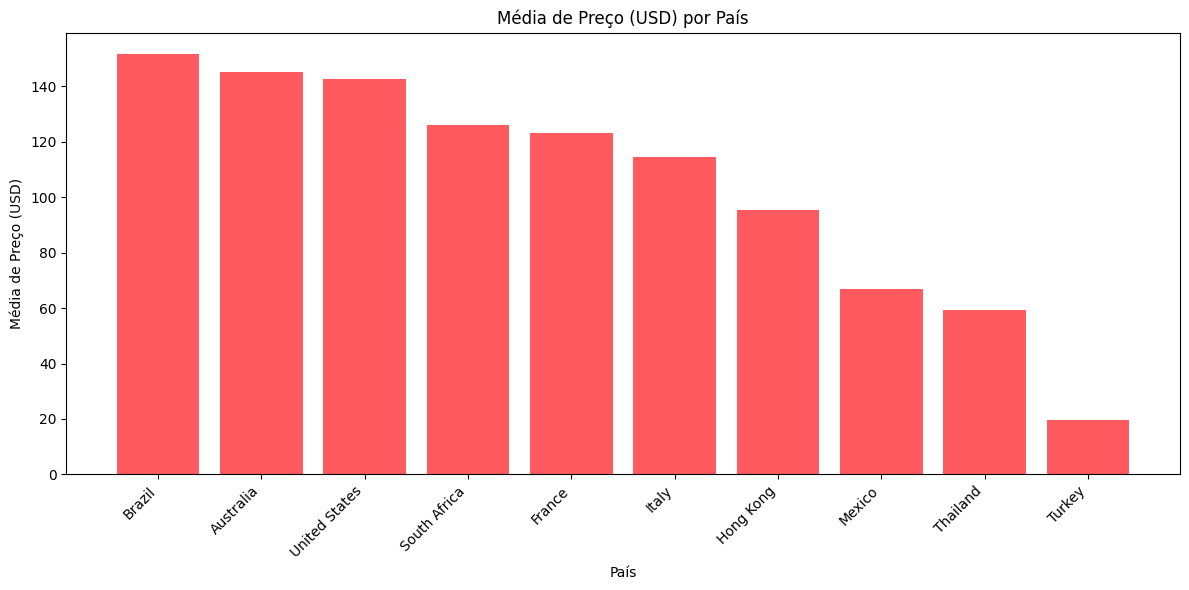

In [104]:
# Calcular a média de 'price_usd' por país
average_prices = out_df.groupby('country')['price_usd'].mean().reset_index()

# Ordenar o DataFrame pela média de 'price_usd' em ordem decrescente
average_prices = average_prices.sort_values(by='price_usd', ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(average_prices['country'], average_prices['price_usd'], color='#ff5a60')
plt.xlabel('País')
plt.ylabel('Média de Preço (USD)')
plt.title('Média de Preço (USD) por País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibir o gráfico
plt.show()

Este é um gráfico simples, podemos trazê-lo direto no dashboard e se necessário, incrementá-lo lá, então deixaremos para trazer outros gráficos assim para a parte de criação do dashboard.

###### $\large{\color{RoyalBlue}{3.7.2.}}$ $\large{\color{CadetBlue}{\textbf{Gráfico de Dispersão 👨🏽‍👨🏽‍👦🏽‍👧🏽}}}$
<a id = "2"></a>

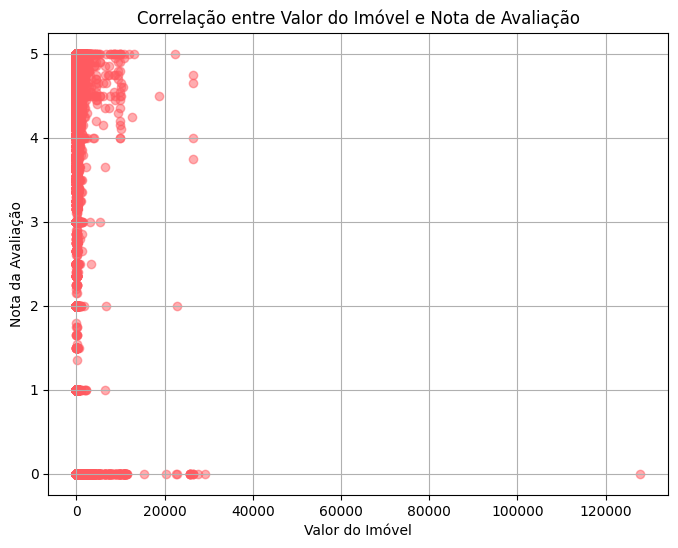

In [105]:
# Criar um gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(out_df['price_usd'], out_df['review_scores_rating'], color='#ff5a60', alpha=0.5)
plt.title('Correlação entre Valor do Imóvel e Nota de Avaliação')
plt.xlabel('Valor do Imóvel')
plt.ylabel('Nota da Avaliação')
plt.grid(True)

# Exibir o gráfico
plt.show()

Usando duas dimensões podemos facilmente ver uma concentração na parte superior esquerda, que indica ótimas avaliações e preço menos, podemos observar um acúmulo de imóveis com nota zero, que entra na questão de imóveis sem avaliação que discutimos anteriormente. Além disso, temos um ponto isolado que custa mais de 120 mil dólares, este ponto é:

In [106]:
selected_columns = ['name', 'neighbourhood', 'city', 'country', 'property_type', 'qty_reviews','price', 'price_usd']
out_df2 = out_df[selected_columns]

out_df2 = out_df2.sort_values(by='price_usd', ascending=False)
out_df2.head(30)

,name,neighbourhood,city,country,property_type,qty_reviews,price,price_usd
181027,Temporary rentals for Brazilian Cup.,Sao Cristovao,Rio de Janeiro,Brazil,Shared room in house,0.0,625216,127783.41
162251,Hotel Boutique Maison Salamanca,Cuauhtemoc,Mexico City,Mexico,Room in boutique hotel,0.0,499000,29095.47
134601,B&B Linda House - Double bedroom between Copac...,Copacabana,Rio de Janeiro,Brazil,Private room in bed and breakfast,0.0,134562,27502.16
44515,3 quartos Elegante na Av Atlantica com Vista P...,Copacabana,Rio de Janeiro,Brazil,Entire apartment,0.0,129233,26413.01
245011,Owesome flat in Botafogo,Botafogo,Rio de Janeiro,Brazil,Entire apartment,0.0,129080,26381.74
245787,Rio Spot Homes T027,Barra da Tijuca,Rio de Janeiro,Brazil,Entire apartment,4.0,129080,26381.74
64485,Apartamento Alma Carioca | RIO136,Ipanema,Rio de Janeiro,Brazil,Entire apartment,3.0,129080,26381.74
219194,Amplo apartamento para famílias,Lagoa,Rio de Janeiro,Brazil,Entire apartment,0.0,129080,26381.74
235968,Studio in Botafogo,Botafogo,Rio de Janeiro,Brazil,Entire apartment,97.0,129080,26381.74
239720,Linda vista com jardim em Santa Teresa,Santa Teresa,Rio de Janeiro,Brazil,Entire apartment,33.0,129080,26381.74


*'Temporary rentals for Brazilian Cup'* no Rio de Janeiro, acho improvável um imóvel ter este valor de diária mesmo em uma data especial como a de uma Copa do Mundo, além disso, foi por causa deste imóvel que a média dos imóveis do Brasil foi a mais alta entre todos os países, sendo uma surpresa para 0 pessoas que ele não foi alugado nenhuma vez, até porquê, é 120 mil em um quarto compartilhado kkrying 🤣

Além do fato dele ser um imóvel anunciado como um aluguel temporário por causa da Copa do Mundo e ela já passou... Vou remover este dado do dataset.

In [107]:
out_df = out_df.drop(181027)


Desconsiderando este imóvel que acabamos de excluir, os outros imóveis também possuem um valor bem alto, um gráfico que é bom para identificação desses possíveis outliers é o boxplot:

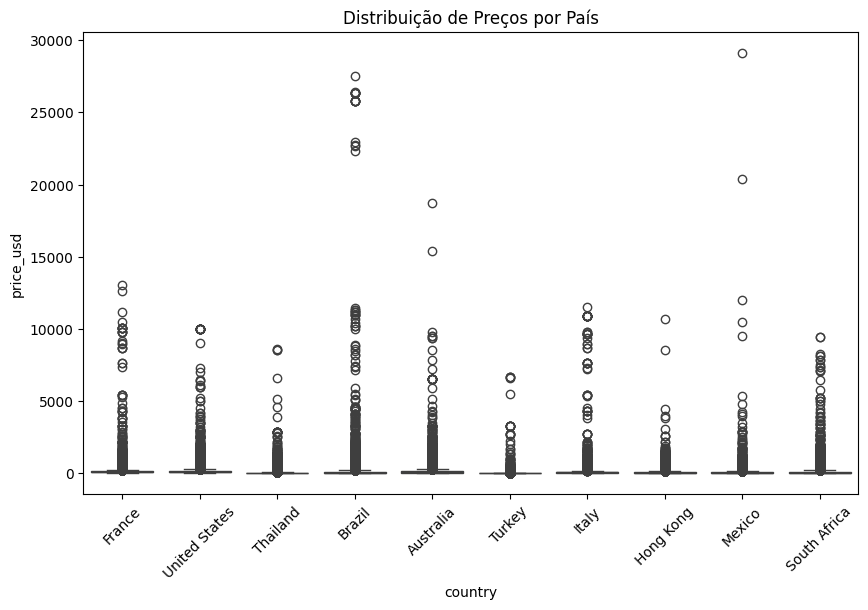

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=out_df, x='country', y='price_usd')
plt.title('Distribuição de Preços por País')
plt.xticks(rotation=45)
plt.show()

Entramos no [dilema dos outliers](https://chat.openai.com/share/9f8a8820-1028-4d27-a055-3200ca0e71d2). 

#### **Poderíamos simplesmente remover esses pontos isolados para ter valores, como médias, mais coerentes com nossos dados reais?**

Eu não sou especialista neste assunto de imóveis, então o que me restou foi realizar um cornojob, onde pesquisei no próprio site da Airbnb imóveis nestes locais com filtros para obter os maiores valores, inclusive, faltou um 'Filtrar por maior preço' no site, em alguns casos eu tive que editar o valor direto na URL para filtrar.

- [Rio de Janeiro](https://www.airbnb.com/s/Rio-de-Janeiro--Rio-de-Janeiro--Brazil/homes?adults=2&tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2023-11-01&monthly_length=3&price_filter_input_type=2&price_filter_num_nights=5&channel=EXPLORE&search_type=autocomplete_click&date_picker_type=calendar&source=structured_search_input_header&price_min=18000&query=Rio%20de%20Janeiro%2C%20RJ&place_id=ChIJW6AIkVXemwARTtIvZ2xC3FA)
- [Austrália](https://www.airbnb.com/s/Paddington-Sydney/homes?adults=2&tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2023-11-01&monthly_length=3&price_filter_input_type=2&price_filter_num_nights=5&channel=EXPLORE&search_type=filter_change&date_picker_type=calendar&source=structured_search_input_header&query=Paddington%20NSW%2C%20Australia&place_id=ChIJt4nzrAiuEmsRcMUyFmh9AQU&price_min=2478&tier_ids%5B%5D=2)
- [Cidade do México](https://www.airbnb.com/s/Mexico-City--Mexico-City--Mexico/homes?adults=2&tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2023-11-01&monthly_length=3&price_filter_input_type=2&price_filter_num_nights=5&channel=EXPLORE&search_type=filter_change&date_picker_type=calendar&source=structured_search_input_header&price_min=18000&query=Mexico%20City%2C%20Mexico%20City%2C%20Mexico&place_id=ChIJB3UJ2yYAzoURQeheJnYQBlQ&federated_search_session_id=5cc6ea3e-4781-4ae9-b33f-a6ccf08c2690&pagination_search=true&cursor=eyJzZWN0aW9uX29mZnNldCI6MCwiaXRlbXNfb2Zmc2V0IjowLCJ2ZXJzaW9uIjoxfQ%3D%3D)

Em todos os casos existe imóveis de alto padrão correspondentes aos preços altos encontrados no dataset, então aqueles valores que por mais que sejam muito altos, são reais.

#### **Decisão:**
Vou manter todos esses dados, posso na etapa do dashboard criar uma label para filtrar e excluir esses valores da visualização dos dados, para quando for pertinenete.

##### *'Ah! mas você já removeu aquela linha que tinha um quarto compartilhado de 120 mil dólares no RJ'*

Bem, já havia dito o quão rídiculo era aquele caso, pelo próprio dataset era possível saber que não se tratava de um imóvel luxuoso, mas como desencargo de consciência, eu também realizei uma pesquisa com imóveis no RJ por mais de 100k dólares e só achei outros belos e majestosos imóveis como o que excluí, o melhor que desta vez tem fotos, vale a pena conferir:

[Rio de Janeiro +100k USD](https://www.airbnb.com/s/Rio-de-Janeiro--Rio-de-Janeiro--Brazil/homes?adults=2&tab_id=home_tab&refinement_paths[]=%2Fhomes&flexible_trip_lengths[]=one_week&monthly_start_date=2023-11-01&monthly_length=3&price_filter_input_type=2&price_filter_num_nights=5&channel=EXPLORE&search_type=autocomplete_click&date_picker_type=calendar&source=structured_search_input_header&price_min=100000&query=Rio%20de%20Janeiro%2C%20RJ&place_id=ChIJW6AIkVXemwARTtIvZ2xC3FA)

Vamos voltar ao nosso gráfico de dispersão, agora sem aquele outlier, os pontos que estavam achatados na esquerda serão melhores distribuídos.
Também vamos aproveitar e incrementar o gráfico, adicionando mais um eixo nele, plotando assim um gráfico em 3D, com:

* Valor do imóvel
* Review do imóvel
* Quantidade de review 

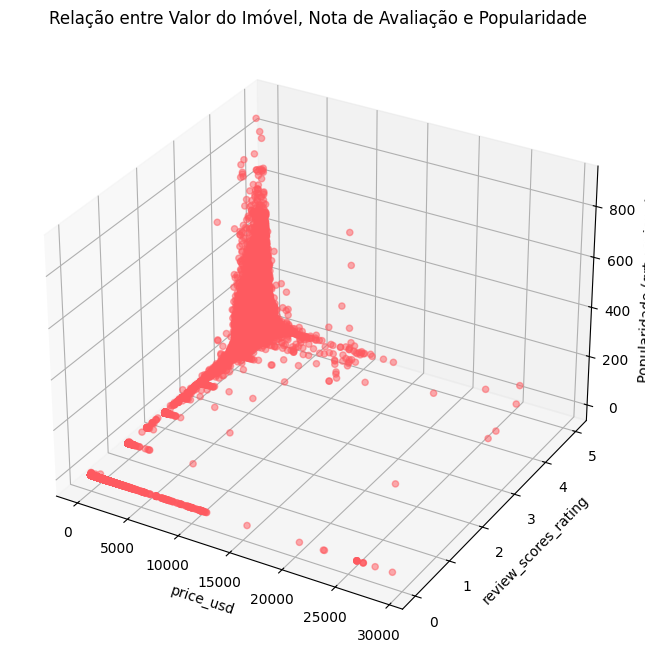

In [109]:
# Criar um gráfico tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = out_df['price_usd']
y = out_df['review_scores_rating']
z = out_df['qty_reviews']

# Scatter plot tridimensional
ax.scatter(x, y, z, c='#ff5a60', marker='o', alpha=0.5)

ax.set_xlabel('price_usd')
ax.set_ylabel('review_scores_rating')
ax.set_zlabel('Popularidade (qrt_reviews)')

plt.title('Relação entre Valor do Imóvel, Nota de Avaliação e Popularidade')

# Exibir o gráfico tridimensional
plt.show()

Com este gráfico atual a gente separou o joio do trigo 🌾.
Antes um imóvel com alto valor poderia receber 1 ou 2 feedbacks e ficar bem posicionado, usando a quantidade de reviews sabemos quais são de fato os mais populares e lucrativos.
Se você tem dificuldade em enxergar em um mapa de 3 dimensões, neste gráfico a melhor posição é para frente, onde as revies tendem a 5, para cima, onde a popularidade (etiqueta cortada), está tendendo a 800 e por fim, onde o preço está para direta, chegando até 30 mil.

Conseguiu entender? Bom! Então vamos complicar mais um pouco... Podemos agrupor por instant_bookable, essa variável basicamente determina o que pode ser alugado de imediato e o que não pode.
Casas sem hospedeiros podem ser alugadas instantaneamente, já as casas que estão alugadas, precisam ser reservadas para o final do contrato atual.

Então mesmo ocupando uma ótima posição no gráfico, se a casa está disponível, é sinal que dinheiro por ela não tá entrando no caixa.



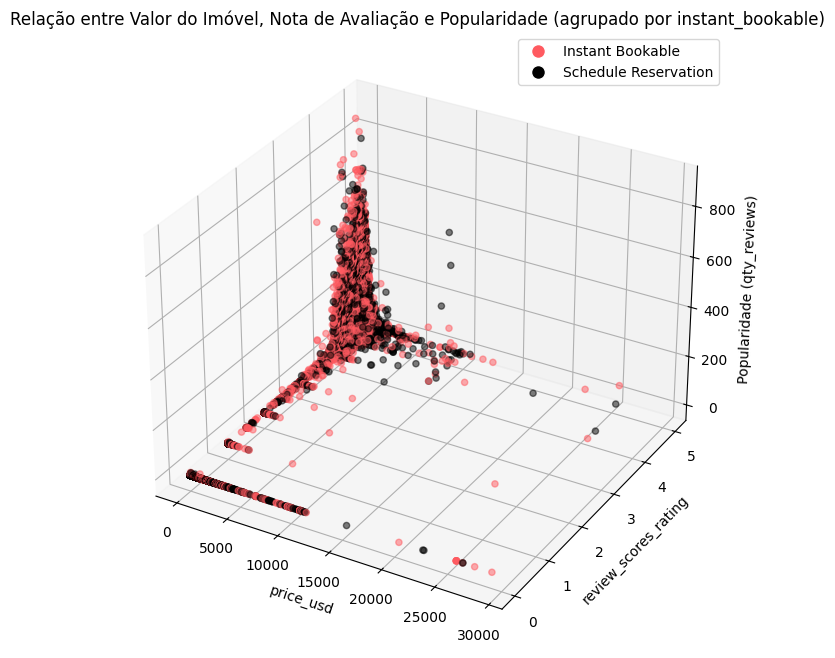

In [110]:


color_map = {'Instant Bookable': '#ff5a60', 'Schedule Reservation': 'black'}
colors = out_df['instant_bookable'].map(color_map)

# Criar um gráfico tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = out_df['price_usd']
y = out_df['review_scores_rating']
z = out_df['qty_reviews']

# Scatter plot tridimensional
ax.scatter(x, y, z, c=colors, marker='o', alpha=0.5)

ax.set_xlabel('price_usd')
ax.set_ylabel('review_scores_rating')
ax.set_zlabel('Popularidade (qty_reviews)')

# Adicionar legenda
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Instant Bookable', markerfacecolor='#ff5a60', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Schedule Reservation', markerfacecolor='black', markersize=10)]
ax.legend(handles=legend_elements)



plt.title('Relação entre Valor do Imóvel, Nota de Avaliação e Popularidade (agrupado por instant_bookable)')

# Exibir o gráfico tridimensional
plt.show()


###### $\large{\color{RoyalBlue}{3.7.3.}}$ $\large{\color{CadetBlue}{\textbf{Mapa de Calor 🔥🗺️}}}$
<a id = "3"></a>

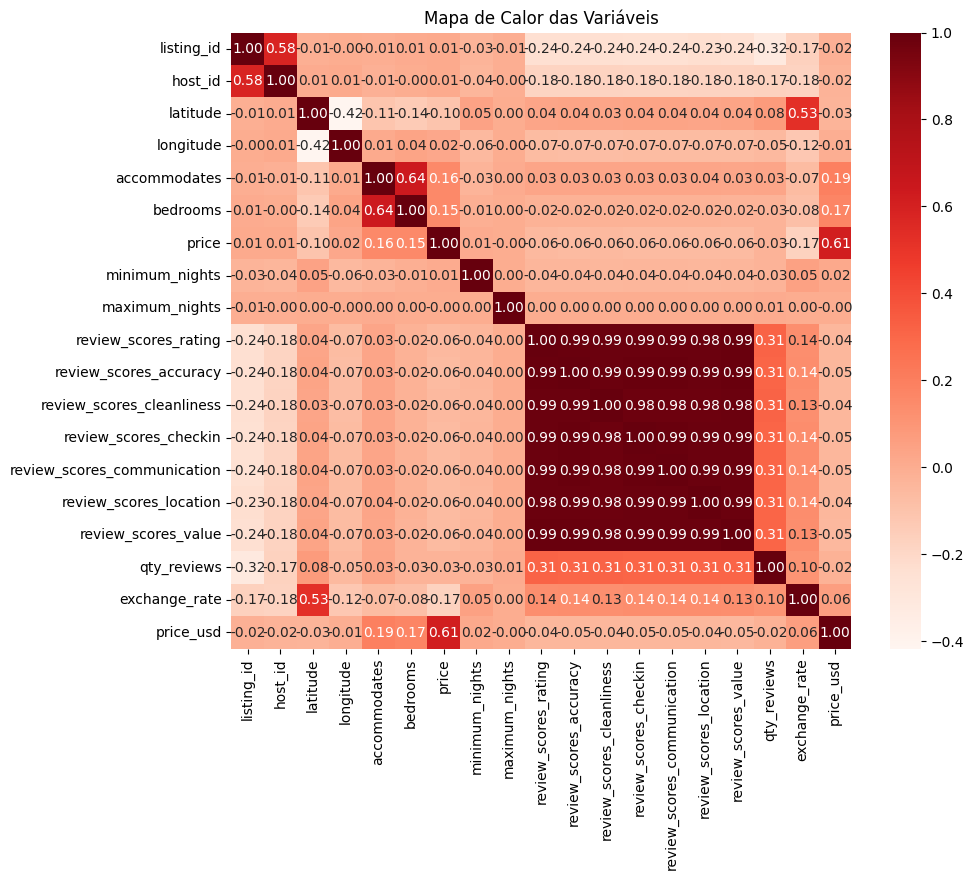

In [111]:
# Selecionar as colunas numéricas
numeric_columns = out_df.select_dtypes(include=['number'])

# Calcular a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Criar um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Mapa de Calor das Variáveis')
plt.show()

Tirando as correlações óbvias, como notas das reviews que são correlacionadas, assim como o valor da moeda e seu respectivo valor convertido em dólar e afins, não achei nenhum ponto muito interessante, mas este heatmap é apenas das variáveis numéricas, vamos finalizar a exploração em Python e continuar em nosso dashboard.

##### $\large{\color{RoyalBlue}{3.8.}}$ $\large{\color{CadetBlue}{\textbf{Definindo um Score 🥇}}}$
<a id = "8"></a>
##### [Voltar ao sumário 🔙](#sumario)

Conforme vimos no [gráfico de dispersão](#2), quando trazemos uma contextualização da situação de negócio para os dados analisados, observar uma váriavel isolada, duas ou mais, pode não ser o suficiente e o pior, elas podem nos levar a cometer erros em nossas decisões, o gráfico de dispersão em 3D que montamos ele ajuda muito a entendermos como aquelas 3 variáveis se comportam para a definição dos melhores imóveis, porém, se a leitura dele pode ser difícil até para um analista fazer de bate e pronto, então imagina para uma diretoria...

Então para o dashboard a minha ideia e traduzir aquele gráfico em uma tabela, que simplesmente traga um 'Top 5 Melhores Imóveis' e para isso, eu vou criar um sistema de pontuação que relacione essas 3 váriaveis.

#### **Pontos de Atenção ⚠️**

  1. Não podemos simplesmente relacionar um valor com o outro diretamente, que diferente de um gráfico, não teremos eixos distintos, trabalharemos em um único plano, então o valor do imóvel tem muito mais dígitos que comparado as notas que vão até o número 5.
  **Solução:** Normalizar os dados.

  2. As 3 variáveis tendo a mesma proporção traz uma nova questão, uma variável é mais importante que outra para caráter de decisão?  
  **Solução:** Criação arbitrária de pesos, para dosar cada variável.


#### **Fórmula:**

Score = (Peso_Preço * Preço) + (Peso_Nota * Nota) + (Peso_Qty_Review * Qty_Review)

In [112]:
# Defição dos pesos para cada variável
peso_preco = 0.4
peso_nota = 0.2
peso_reviews = 0.4
# Esses valores podem ser alterados, mas a soma de todos precisa resutar em 1


# Vamos criar um novo DF copiando o DF original
score_df = out_df.copy()

# Normalizando as colunas 'price_usd', 'review_scores_rating' e 'qty_reviews'
scaler = MinMaxScaler()

# Essas colunas são auxiliares, então após o cálculo da pontuação, podemos excluí-las
score_df[['price_usd_normalized', 'review_scores_rating_normalized', 'qty_reviews_normalized']] = scaler.fit_transform(out_df[['price_usd', 'review_scores_rating', 'qty_reviews']])

# Calcular a pontuação usando a fórmula
score_df['Score'] = (peso_preco * score_df['price_usd_normalized'] +
                             peso_nota * score_df['review_scores_rating_normalized'] +
                             peso_reviews * score_df['qty_reviews_normalized'])

# Excluindo as colunas normalizadas
score_df.drop(['price_usd_normalized', 'review_scores_rating_normalized', 'qty_reviews_normalized'], axis=1, inplace=True)

# Ordenando o DataFrame pela pontuação em ordem decrescente
score_df = score_df.sort_values(by='Score', ascending=False)

score_df.head()


,listing_id,name,host_id,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,qty_reviews,country,exchange_rate,price_usd,Score
235968,8884452,Studio in Botafogo,19273271,Botafogo,Rio de Janeiro,-22.94958,-43.18624,Entire apartment,Entire place,3,NaN,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",129080,2,105,4.75,5.0,4.5,5.0,4.5,5.0,4.5,Instant Bookable,97.0,Brazil,0.204383,26381.74,0.596239
167067,17222007,Sweet & cosy room next to Canal Saint Martin,84901734,Enclos-St-Laurent,Paris,48.87030,2.36032,Room in boutique hotel,Private room,2,1.0,"[""Paid parking off premises"", ""Shampoo"", ""Lock...",76,1,90,4.70,5.0,5.0,5.0,5.0,5.0,5.0,Instant Bookable,891.0,France,1.088257,82.71,0.589137
131663,8637229,香港 Hong Kong 長洲 Cheung Chau lsland,43233075,Islands,Hong Kong,22.20744,114.02934,Private room in condominium,Private room,2,1.0,"[""Hair dryer"", ""Hot water"", ""Air conditioning""...",629,1,1125,4.80,5.0,4.5,5.0,5.0,4.5,4.5,Instant Bookable,828.0,Hong Kong,0.127883,80.44,0.564823
239720,14331562,Linda vista com jardim em Santa Teresa,19273271,Santa Teresa,Rio de Janeiro,-22.92727,-43.19276,Entire apartment,Entire place,6,1.0,"[""BBQ grill"", ""Air conditioning"", ""Essentials""...",129080,2,180,4.65,5.0,4.5,5.0,4.5,4.5,4.5,Schedule Reservation,33.0,Brazil,0.204383,26381.74,0.563507
178743,12351,Sydney City & Harbour at the door,17061,Sydney,Sydney,-33.86515,151.19190,Private room in townhouse,Private room,2,1.0,"[""Patio or balcony"", ""Garden or backyard"", ""Co...",14315,2,7,4.75,5.0,5.0,5.0,5.0,5.0,5.0,Schedule Reservation,526.0,Australia,0.653674,9357.35,0.554783


Vamos agora dar uma analisada neste Top 5.

Embora tenhamos preços muito altos no topo, também temos em algumas posições valores bem baixos, vamos multiplicá-los pela quantidade de reviews, na ideia que isso proporcionalmente indique a quantidade de clientes destes imóveis e assim, termos um valor arrecadado total com o imóvel.

###### Detalhe: Esse valor arrecadado não é o valor absoluto arrecadado, porque muitas pessoas alugam os imóveis e não enviam review, este é um valor tendo base apenas a quantidade de pessoas que sabemos devido as reviews.


In [113]:

novo_df = score_df[['price_usd', 'review_scores_rating', 'qty_reviews','Score']].copy()
novo_df['price_accumulated'] = score_df['price_usd'] * score_df['qty_reviews']
novo_df.head()

,price_usd,review_scores_rating,qty_reviews,Score,price_accumulated
235968,26381.74,4.75,97.0,0.596239,2559028.78
167067,82.71,4.70,891.0,0.589137,73694.61
131663,80.44,4.80,828.0,0.564823,66604.32
239720,26381.74,4.65,33.0,0.563507,870597.42
178743,9357.35,4.75,526.0,0.554783,4921966.10


Mesmo o preço acumulado dos imóveis de 80 dólares sendo inferior ao #4 e #5, ainda veja como merecido a posição deles, aquele número alto de reviews com mais de 800 me diz mais sobre o sucesso daqueles imóveis do que o que teve 33 reviews.

Eu testei várias proporções de pesos, mas a que achei mais interessante foi a relação de 80% do pseudo preço acumulado + 20% de ponderação pela nota geral das reviews.

Você pode testar outras, no dashboard teremos a tabela dos melhores, junto com o ID do imóvel, assim bou fazer outro gráfico que seja possível acompanhar a quantidade de reviews históricas de um imóvel em específico, trazendo ainda mais contexto para o nosso sistema de pontuação.

In [114]:
# Extrair a coluna 'host_location'
coluna_host_location = df['host_location']

# Criar um novo DataFrame apenas com a coluna 'host_location'
novo_df = pd.DataFrame({'host_location': coluna_host_location})

# Salvar o novo DataFrame em um arquivo Excel
novo_df.to_excel('host_location.xlsx', index=False, engine='openpyxl')

Antes de sair eu baixei esta coluna só para dar uma analisada no Excel mesmo, tenho 2 pontos para ela:

* Incluir lista suspensa para validação de dados para a localização;
* Resolver o problema de 2 ou mais países cadastrados em um único registro.

Essa coluna foi excluída da nossa base final, mas pensando como um profissional da companhia, este ponto não poderia ser negligenciado, assim como tornar obrigatórios alguns campos como a quantidade de quartos.

## $\large{\color{RoyalBlue}{4.}}$ $\large{\color{CadetBlue}{\textbf{Salvando os Resultados 💾}}}$ 
<a id = "save"></a>
##### [Voltar ao sumário 🔙](#sumario) 

In [115]:
output = 'Listings_output.csv'

# Salve o DataFrame como um arquivo CSV com codificação UTF-8
score_df.to_csv(output, encoding='utf-8', index=False)

print(f'O arquivo {output} foi salvo com sucesso.')

O arquivo Listings_output.csv foi salvo com sucesso.


In [116]:
output = 'Reviews_output.csv'

# Salve o DataFrame como um arquivo CSV com codificação UTF-8
df_rev.to_csv(output, encoding='utf-8', index=False)

print(f'O arquivo {output} foi salvo com sucesso.')

O arquivo Reviews_output.csv foi salvo com sucesso.
